<a href="https://colab.research.google.com/github/hesther/teaching/blob/main/python101/Python_for_Beginners_Cheminfo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chemical reactions
We can also manipulate molecules, such as deleting or adding substructures, or performing reactions. For example, let us oxidize all all alcohols to ketones or aldehydes if possible (possible if there is at least one hydrogen attached to the carbonyl carbon!)


In [2]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 53.7 MB/s eta 0:00:00


In [15]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem, Descriptors


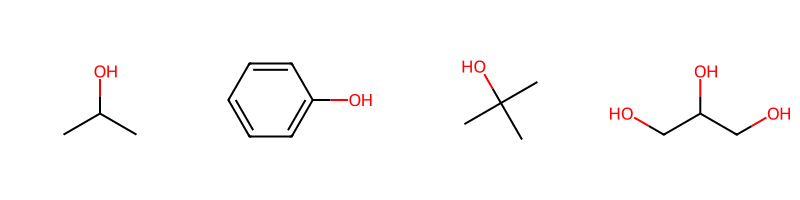

In [7]:
isopropanol = Chem.MolFromSmiles('CC(C)O')
phenol = Chem.MolFromSmiles('c1cccc(O)c1')
t_butanol = Chem.MolFromSmiles('C(C)(C)(C)O')
glycerol = Chem.MolFromSmiles('OCC(O)CO')

alcohols = [isopropanol, phenol, t_butanol, glycerol]

Chem.Draw.MolsToGridImage(alcohols, molsPerRow=4)

In [8]:
rxn = AllChem.ReactionFromSmarts('[CH:1][O:2]>>[C:1]=[O:2]')
rxn.RunReactants((isopropanol,))

((<rdkit.Chem.rdchem.Mol at 0x7ed338230ac0>,),)

In [9]:
rxn.RunReactants((t_butanol,))

()

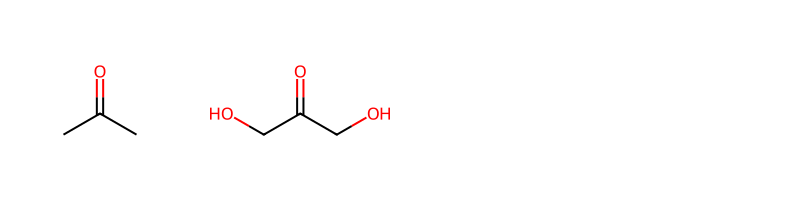

In [10]:
possible_products=[]
for alcohol in alcohols:
  for result in rxn.RunReactants((alcohol,)):
      for product in result:
        possible_products.append(product)
Chem.Draw.MolsToGridImage(possible_products, molsPerRow=4)

# Exercise:
Currently, our reaction only oxidizes secondary alcohols (since we say exactly "CH", not e.g. "CH2"). Change the reaction to primary alcohols ("CH2") and plot all products.

# Application: Predicting water solubility given some data
We can also train a simple linear regression model, e.g. to predict water solubility. Download the SI from https://pubs.acs.org/doi/10.1021/ci034243x and save it as esol.csv

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
d = pd.read_csv("esol.csv")
d

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [19]:
mols = [Chem.MolFromSmiles(x) for x in d['SMILES']]
X = np.array([list(Descriptors.CalcMolDescriptors(mol).values()) for mol in mols])
y = np.array(d['measured log(solubility:mol/L)'])

X.shape, y.shape

((1144, 217), (1144,))

Text(0, 0.5, 'Predicted solubility')

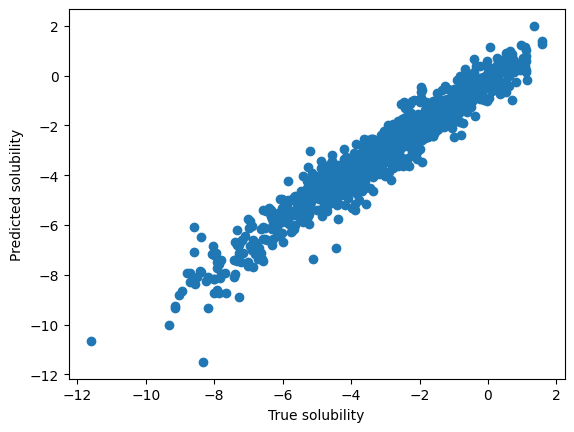

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

plt.scatter(y, y_pred)
plt.xlabel("True solubility")
plt.ylabel("Predicted solubility")

#Substructure search
We could also search a database for a specific pattern, for example we might want to only use molecules that have a carbonyl group. For this, we can use the method `HasSubstructMatch`, which takes two molecules and return either `True` or `False` if the first molecule is a substructure of the second one:


In [21]:
acetone = Chem.MolFromSmiles('CC(=O)C')
acetone

In [22]:
substructure = Chem.MolFromSmiles('C=O')
substructure

In [23]:
acetone.HasSubstructMatch(substructure)

True

In [25]:
d['has C=O']= [Chem.MolFromSmiles(smi).HasSubstructMatch(substructure) for smi in d['SMILES']]
d

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,has C=O
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl,False
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl,False
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl,False
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl,False
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl,False
...,...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC),True
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C,True
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O,True
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O,True


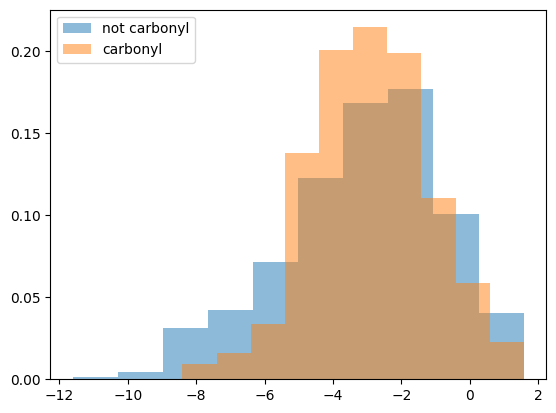

In [38]:
plt.hist(d[d['has C=O']==False]['measured log(solubility:mol/L)'], density=True, alpha=0.5, label='not carbonyl')
plt.hist(d[d['has C=O']==True]['measured log(solubility:mol/L)'], density=True,  alpha=0.5, label='carbonyl')

plt.legend()

#Exercise:
Make another column in the dataframe whether the molecule contains an alcohol ("OH") group and plot whether this changes the distribution of measured solubilities

# Molecular Properties and Filtering (Drug-likeness)
In drug discovery, we often filter molecules based on physicochemical properties.
One common guideline is Lipinski’s Rule of Five:
* Molecular weight ≤ 500
* logP ≤ 5
* ≤ 5 hydrogen-bond donors
* ≤ 10 hydrogen-bond acceptors

Let’s apply these filters with RDKit.

In [53]:
d["MolWt"] = [Descriptors.MolWt(Chem.MolFromSmiles(smi)) for smi in d['SMILES']]
d["LogP"] = [Descriptors.MolLogP(Chem.MolFromSmiles(smi)) for smi in d['SMILES']]
d["HBD"] = [Descriptors.NumHDonors(Chem.MolFromSmiles(smi)) for smi in d['SMILES']]
d["HBA"] = [Descriptors.NumHAcceptors(Chem.MolFromSmiles(smi)) for smi in d['SMILES']]

d["Lipinski_pass"] = ( (d["MolWt"] <= 500) & (d["LogP"] <= 5) & (d["HBD"] <= 5) & (d["HBA"] <= 10) )
d

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,has C=O,has CO,MolWt,LogP,HBD,HBA,Lipinski_pass
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl,False,False,167.850,2.59540,0,0,True
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl,False,False,133.405,2.37650,0,0,True
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl,False,False,167.850,2.59380,0,0,True
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl,False,False,133.405,2.02890,0,0,True
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl,False,False,187.375,2.91890,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC),True,True,287.343,1.98820,1,6,True
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C,True,True,286.114,3.42130,0,3,True
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O,True,True,308.333,3.60960,1,4,True
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O,True,True,354.815,2.56214,3,4,True


In [54]:
d[d["Lipinski_pass"]==False]

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,has C=O,has CO,MolWt,LogP,HBD,HBA,Lipinski_pass
84,1-Hexadecanol,-7.000,-4.940,CCCCCCCCCCCCCCCCO,False,True,242.447,5.46000,1,1,False
105,1-Octadecanol,-8.400,-5.649,CCCCCCCCCCCCCCCCCCO,False,True,270.501,6.24020,1,1,False
109,1-Pentadecanol,-6.350,-4.586,CCCCCCCCCCCCCCCO,False,True,228.420,5.06990,1,1,False
116,"2,2',3,3',4,4',5,5',6,6'-PCB",-11.600,-9.589,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...,False,False,498.662,9.88760,0,0,False
117,"2,2',3,3',4,4',5,5'-PCB",-9.160,-8.468,Clc1cc(c(Cl)c(Cl)c1Cl)c2cc(Cl)c(Cl)c(Cl)c2Cl,False,False,429.772,8.58080,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
1085,Tetrafluthrin,-7.321,-6.339,Cc1c(F)c(F)c(COC(=O)C2C(C=C(Cl)C(F)(F)F)C2(C)C...,True,True,418.736,5.55182,0,2,False
1124,Trichloronate,-5.752,-5.225,CCOP(=S)(CC)Oc1cc(Cl)c(Cl)cc1Cl,False,True,333.604,5.39150,0,3,False
1125,Triclosan,-4.460,-5.645,Oc1cc(Cl)ccc1Oc2ccc(Cl)cc2Cl,False,True,289.545,5.14470,1,2,False
1126,Tricresyl phosphate,-6.010,-6.390,Cc1ccc(OP(=O)(Oc2cccc(C)c2)Oc3ccccc3C)cc1,False,True,368.369,6.25676,0,4,False


# Exercise:
Find one molecule each that does (and does not) pass Lipinski's filter (e.g. by selecting molecules from pubchem, or molecules used today or yesterday) and check manually that the assignment was correct.

# Plotting various structures
Let's start with proteins. Download any pdb or mmcif from the PDB database!

In [3]:
!pip install py3dmol
import py3Dmol

In [10]:
with open("1UBQ.cif") as ifile:
    system = "".join([x for x in ifile])
view = py3Dmol.view(data=system, style={"cartoon": {'color': 'spectrum'}})
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Py3Dmol has many cool visualizations, e.g. surfaces, or plotting a ligand:

In [ ]:
with open("2XNI.cif") as f:
    system = "".join([x for x in f])
view = py3Dmol.view(width=1000, height=1000)
view.addModelsAsFrames(system)
view.setStyle({'model':-1},{'cartoon': {'color':'spectrum'}})
view.addSurface(py3Dmol.VDW,{'opacity':0.7,'color':'white'}, {'chain':'B'})
view.setStyle({'resn':'TR8'},{'stick':{}})
view.zoomTo()
view.show()

How about molecules? py3dmol can also do that!

In [1]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

In [14]:
mol=Chem.MolFromSmiles("CCCCO")
mol=Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
view = py3Dmol.view(data=Chem.MolToMolBlock(mol),style={'stick':{}})
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [15]:
!pip install ase
import ase
import ase.io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.6 MB/s eta 0:00:00


In [16]:
from ase.build import fcc111
slab = fcc111('Cu', size=(4, 4, 2), vacuum=10.0)
slab

Atoms(symbols='Cu32', pbc=[True, True, False], cell=[[10.210621920333747, 0.0, 0.0], [5.105310960166873, 8.842657971447272, 0.0], [0.0, 0.0, 22.08423447177455]], tags=...)

In [19]:
from ase.visualize import view
view(slab, viewer='x3d')

In [21]:
from ase.build import add_adsorbate
from ase import Atoms
molecule = Atoms('2N', positions=[(0.0, 0.0, 0.0), (0.0, 0.0, 1.1)])
add_adsorbate(slab, molecule, 1.85, 'ontop')
view(slab, viewer='x3d')

In [23]:
from ase.calculators.emt import EMT
from ase.optimize import QuasiNewton
slab.calc = EMT()
dyn = QuasiNewton(slab, trajectory='N2Cu.traj')
dyn.run(fmax=0.05)

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 08:11:05       11.689927       1.0797
BFGSLineSearch:    1[  2] 08:11:05       11.625571       0.8772
BFGSLineSearch:    2[  4] 08:11:05       11.588579       0.2165
BFGSLineSearch:    3[  5] 08:11:05       11.583503       0.0889
BFGSLineSearch:    4[  7] 08:11:05       11.580166       0.0929
BFGSLineSearch:    5[  9] 08:11:05       11.579064       0.0397


np.True_

In [24]:
view(slab, viewer='x3d')

What about metal complexes?

In [34]:
atoms = Atoms('CrO6',
              positions=[(0,0,0),
                         (1.6,0,0), (-1.6,0,0),
                         (0,1.6,0), (0,-1.6,0),
                         (0,0,1.6), (0,0,-1.6)])
view(atoms, viewer='x3d')

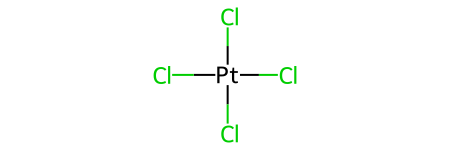

In [2]:
from rdkit.Chem import Draw
molblock = """
  Mrv2014 09152015032D

  5  4  0  0  0  0            999 V2000
    0.0000    0.0000    0.0000 Pt  0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.5000    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    0.0000   -1.5000    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  3  1  0
  1  4  1  0
  1  5  1  0
M  END
"""

mol = Chem.MolFromMolBlock(molblock, sanitize=False)
mol

In [4]:
view = py3Dmol.view(data=Chem.MolToMolBlock(mol),style={'stick':{}})
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Bonus topic: Curve fits to any function:

In [3]:
x = np.array([0.        , 0.21052632, 0.42105263, 0.63157895, 0.84210526,
       1.05263158, 1.26315789, 1.47368421, 1.68421053, 1.89473684,
       2.10526316, 2.31578947, 2.52631579, 2.73684211, 2.94736842,
       3.15789474, 3.36842105, 3.57894737, 3.78947368, 4.        ])
y = np.array([3.1601232 , 2.51355653, 2.04922287, 1.67119795, 1.39839306,
       1.16286242, 1.16987629, 0.89051072, 0.95196474, 0.74648362,
       0.84615551, 0.74217337, 0.70727607, 0.59443931, 0.75201911,
       0.64466555, 0.592885  , 0.57544524, 0.66997523, 0.60861562])

In [4]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

curve_fit(func, x, y)

(array([2.53386686, 1.36242047, 0.61595138]),
 array([[ 0.00251695,  0.00078006, -0.00025808],
        [ 0.00078006,  0.0036179 ,  0.00098031],
        [-0.00025808,  0.00098031,  0.00053465]]))

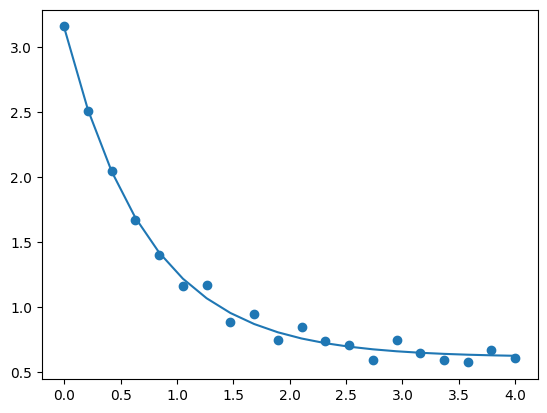

In [6]:
plt.scatter(x, y)
plt.plot(x, func(x,2.53386686, 1.36242047, 0.61595138))

# Bonus: RDKit plotting options

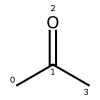

In [9]:
from rdkit.Chem.Draw import IPythonConsole

mol = Chem.MolFromSmiles("CC(=O)C")
IPythonConsole.molSize = (100, 100)
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.useBWAtomPalette()
mol